# Bike Sharing Assignment

**Objectives:**

Which variables are significant in predicting the demand for shared bikes?

How well those variables describe the bike demands?



## Reading and Understanding the Data:

In [1]:
#Importing the relevant packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the csv file and checking the data

bikesharing = pd.read_csv('E:\Documents\AIML_masters\course2_ML_LinearRegression\Week2\BikeSharing.csv')
bikesharing.head(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
bikesharing.shape

(730, 16)

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values, The dataframe contains **int** and **float** values except one **object** type attribute as the date column.

**Performing data formatting like deleting and editing of columns for further analysis**

In [5]:
#removing 'date' and 'instant' columns as its not required for analysis

bikesharing = bikesharing.drop(['instant','dteday'],axis=1)

#removing 'casual' and 'registered' columns as the values are counted in the target variable

bikesharing = bikesharing.drop(['casual','registered'],axis=1)
bikesharing.head(10)
 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [6]:
#converting some features to categorical variables for ease of analysis

season_map = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikesharing['season'] = bikesharing['season'].replace(season_map)

weather_map = {1:'clear',2:'cloudy',3:'lightrain',4:'heavyrain'}
bikesharing['weathersit'] = bikesharing['weathersit'].replace(weather_map)

bikesharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,clear,6.184153,7.54440,48.2917,14.958889,1321


## Visualisation of the data: 

Creating boxplot and scatterplots to assess if a linear regression model is viable, 
and to assess how the predictors relate to the target variable.



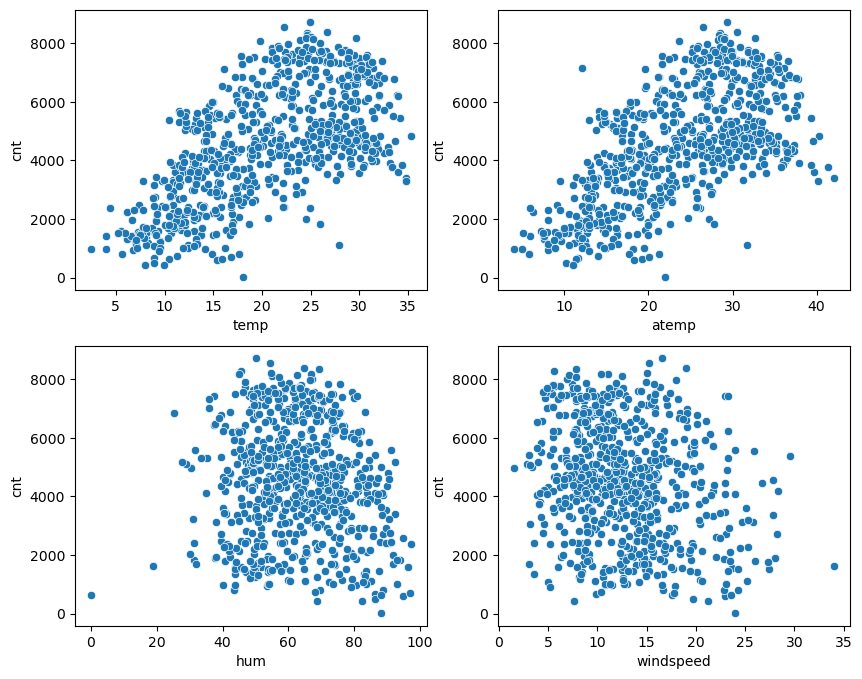

In [7]:


#scatter plots for the numeric variables with a continuous distribution

numerical_variables = ['temp', 'atemp', 'hum', 'windspeed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, variable in enumerate(numerical_variables):
    row = i // 2  
    col = i % 2   
    sns.scatterplot(x=variable, y='cnt', data=bikesharing, ax=axes[row, col])
    
plt.show()

The predictors **'temp'** and **'atemp'** have a linear relation with the target variable with increasing variance.

**'hum'** and **'windspeed'** dont seem to have any meaningful relation to demand fo bikes.



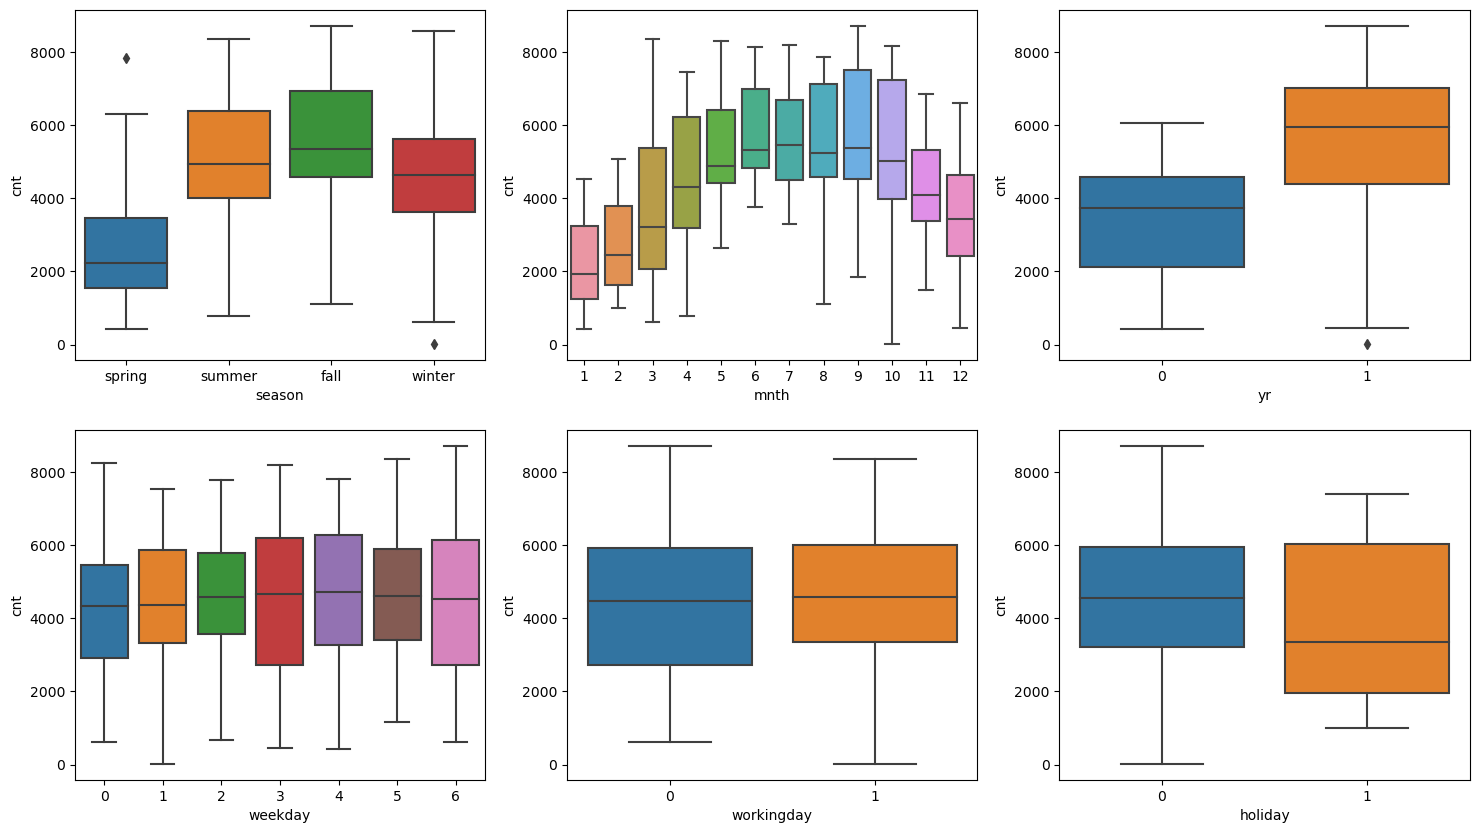

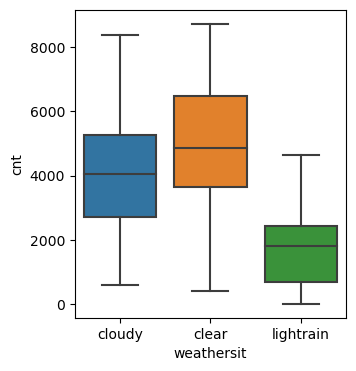

In [8]:
#creating box plots for the categorical variables

categorical_variables = ['season','mnth','yr','weekday','workingday','holiday']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, variable in enumerate(categorical_variables):
    row = i // 3 
    col = i % 3   
    sns.boxplot(x=variable, y='cnt', data=bikesharing, ax=axes[row, col])
    
plt.show()

plt.figure(figsize=(3.5,4))
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)
plt.show()

**Inferences**

The predictors **'season'** and **'mnth'** are similarly distributed which is to be expected.

The demand has clearly increased from **2018 to 2019**.

There is very little variation in the demand between different days of the week and same is true whether it is working day or not.

There is clearly less demand on holidays.

The demand is most during clear weather and declines slightly on cloudy days with a sharp drop on rainy days.


## Data Preparation:

In [9]:
#creating the dummy variables

dummy_pd = pd.get_dummies(bikesharing[['season','weathersit']])


In [10]:
#viewing the dummies dataframe

dummy_pd.head()

,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_cloudy,weathersit_lightrain
0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0
3,0,1,0,0,1,0,0
4,0,1,0,0,1,0,0


In [11]:
#dropping one predictor from each 'season' and 'weathersit' as only n-1 levels are required

dummy_pd = dummy_pd.drop(['season_winter','weathersit_lightrain'],axis=1)

In [12]:
#adding dummies to the original dataframe 

bikesharing = pd.concat([bikesharing,dummy_pd],axis=1)

In [13]:
#removing original feature 'season' and 'weathersit'

bikesharing = bikesharing.drop(['season','weathersit'], axis=1)

In [14]:
#viewing the dataframe

bikesharing.head(10)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_cloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,1,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,1,0
5,0,1,0,4,1,8.378268,11.66045,51.8261,6.000868,1606,0,1,0,1,0
6,0,1,0,5,1,8.057402,10.44195,49.8696,11.304642,1510,0,1,0,0,1
7,0,1,0,6,0,6.765000,8.11270,53.5833,17.875868,959,0,1,0,0,1
8,0,1,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,1,0,1,0
9,0,1,0,1,1,6.184153,7.54440,48.2917,14.958889,1321,0,1,0,1,0


**Splitting into test and train sets**

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np 

#specifying a seed number and splitting the dataframe

np.random.seed(0)
bike_train, bike_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

**Reescaling the values using MinMaxScaler to fit between 0 and 1**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
#applying to all features except dummies and features containing only 0 and 1

numerics = ['mnth','weekday','hum','windspeed','temp','atemp','cnt']
bike_train[numerics] = scaler.fit_transform(bike_train[numerics]) 

In [18]:
bike_train.head(10)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_cloudy
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,1,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0,1
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,1,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,1
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,0,1
580,1,0.636364,0,1.000000,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,0,1,0
500,1,0.363636,0,0.500000,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,1,1,0
479,1,0.272727,0,0.500000,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,1,1,0
472,1,0.272727,0,0.500000,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,1,0,1


In [19]:
bike_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.262745,0.243137,0.245098,0.627451,0.343137
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.440557,0.429398,0.430568,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


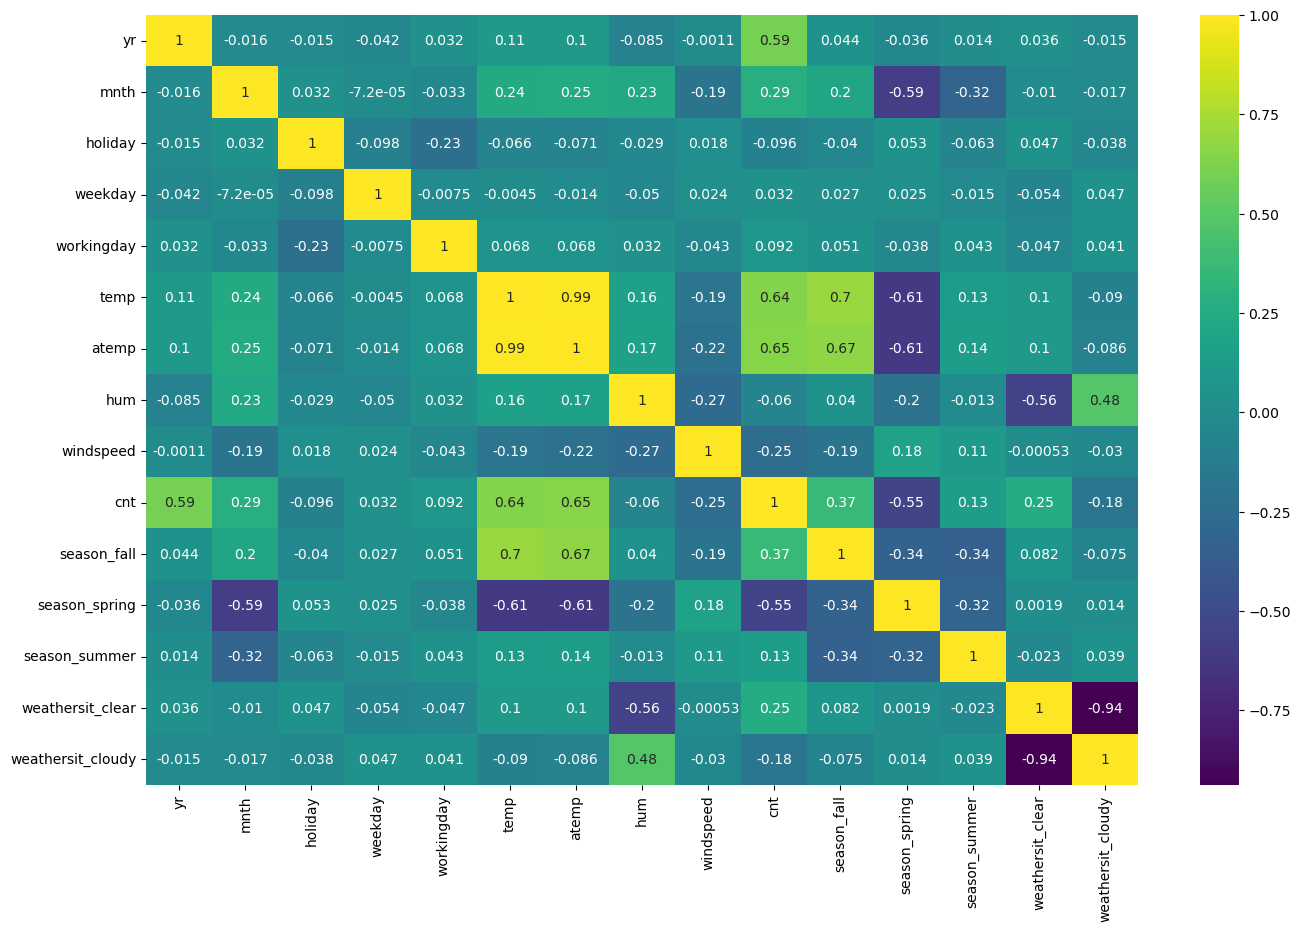

In [20]:
#checking the correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(bike_train.corr(), annot = True, cmap="viridis")
plt.show()

**Dividing into X and Y sets for model building**

In [21]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building the Model:

Fitting a regression line through the data and analysing the fit using statsmodel

In [22]:
import statsmodels.api as sm

#adding the constant to dataframe
X_train_lm = sm.add_constant(X_train)

#fitting the model to the training data
lr_1 = sm.OLS(y_train, X_train_lm).fit()

#checking the fit and signifance of the co-efficients
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.69e-182
Time:                        18:54:55   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0777      0.050      1.552      0.121      -0.021       0.176
yr                    0.2322      0.008     27.708      0.000       0.216       0.249
mnth                  0.0126      0.026      0.488      0.626      -0.038       0.063
holiday              -0.0642      0.027     -2.365      0.018      -0.117      -0.011
weekday               0.0486      0.012      3.899      0.000       0.024       0.073
workingday            0.0188      0.009      2.071      0.039       0.001       0.037
temp                  0.4353      0.139      3.136      0.002       0.163       0.708
atemp                 0.0605      0.142      0.426      0.670      -0.218       0.339
hum                  -0.1260      0.039     -3.233      0.001      -0.203      -0.049
windspeed            -0.1781      0.027     -6.590      0.000      -0.231      -0.125
season_fall          -0.0854      0.019     -4.588      0.000      -0.122      -0.049
season_spring        -0.1556      0.022     -7.031      0.000      -0.199      -0.112
season_summer        -0.0398      0.019     -2.040      0.042      -0.078      -0.001
weathersit_clear      0.2478      0.027      9.082      0.000       0.194       0.301
weathersit_cloudy     0.1896      0.026      7.354      0.000       0.139       0.240
==============================================================================
Omnibus:                       73.742   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.299
Skew:                          -0.732   Prob(JB):                     1.29e-41
Kurtosis:                       5.592   Cond. No.                         96.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**

The adjusted R-sqaure value of 0.829 suggests the predictor variables explain the data pretty well.

The very low value of Prob(F-statistic) also indicates the model is statistically significant.

The p-values do show a couple of features with very high p-values and need to be removed.

**Finding VIF**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
#creating a dataframe vif and adding the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns

#finding the VIF and rounding to 2 decimals 

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

#sorting the values in descending order

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,386.83
6,atemp,366.52
7,hum,23.10
12,weathersit_clear,15.03
1,mnth,12.10
13,weathersit_cloudy,9.23
10,season_spring,5.86
9,season_fall,5.28
11,season_summer,5.03
8,windspeed,4.80


Some of the features have very high VIF values, anything above **10** is unacceptable.

With both high 'p' and VIF values features **'mnth'** and **'atemp'** are both best eliminated. 

In [25]:
#dropping the high VIF and insignificant variables

X_train2 = X_train.drop(['atemp'], axis=1)

In [26]:
#building model no:2 and checking summary

X_train_lm = sm.add_constant(X_train2)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.31e-183
Time:                        18:54:55   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0781      0.050      1.562      0.119      -0.020       0.176
yr                    0.2321      0.008     27.728      0.000       0.216       0.249
mnth                  0.0126      0.026      0.490      0.624      -0.038       0.063
holiday              -0.0647      0.027     -2.388      0.017      -0.118      -0.011
weekday               0.0483      0.012      3.886      0.000       0.024       0.073
workingday            0.0188      0.009      2.070      0.039       0.001       0.037
temp                  0.4927      0.034     14.441      0.000       0.426       0.560
hum                  -0.1253      0.039     -3.221      0.001      -0.202      -0.049
windspeed            -0.1803      0.026     -6.806      0.000      -0.232      -0.128
season_fall          -0.0868      0.018     -4.730      0.000      -0.123      -0.051
season_spring        -0.1559      0.022     -7.053      0.000      -0.199      -0.112
season_summer        -0.0399      0.019     -2.052      0.041      -0.078      -0.002
weathersit_clear      0.2486      0.027      9.137      0.000       0.195       0.302
weathersit_cloudy     0.1903      0.026      7.397      0.000       0.140       0.241
==============================================================================
Omnibus:                       72.450   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.263
Skew:                          -0.719   Prob(JB):                     5.90e-41
Kurtosis:                       5.579   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#finding the new VIF value for model 2

vif_2 = pd.DataFrame()
vif_2['Features_Model2'] = X_train2.columns

#finding the VIF and rounding to 2 decimals 

vif_2['VIF_model2'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_2['VIF_model2'] = round(vif_2['VIF_model2'],2)

#sorting the values in descending order

vif_2 = vif_2.sort_values(by = "VIF_model2", ascending = False)
vif_2

,Features_Model2,VIF_model2
5,temp,23.20
6,hum,22.98
11,weathersit_clear,14.87
1,mnth,12.10
12,weathersit_cloudy,9.17
9,season_spring,5.86
8,season_fall,5.13
10,season_summer,5.02
7,windspeed,4.60
4,workingday,3.23


Still it is observed the features have high VIF values and next the feature **'mnth'** can be removed.

In [28]:
#dropping the high VIF and insignificant variables

X_train3 = X_train2.drop(['mnth'], axis=1)

In [29]:
#building model no:3 and checking summary

X_train_lm = sm.add_constant(X_train3)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.00e-184
Time:                        18:54:55   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0870      0.047      1.867      0.063      -0.005       0.179
yr                    0.2319      0.008     27.752      0.000       0.216       0.248
holiday              -0.0642      0.027     -2.373      0.018      -0.117      -0.011
weekday               0.0486      0.012      3.924      0.000       0.024       0.073
workingday            0.0187      0.009      2.061      0.040       0.001       0.037
temp                  0.4934      0.034     14.485      0.000       0.426       0.560
hum                  -0.1235      0.039     -3.191      0.002      -0.200      -0.047
windspeed            -0.1800      0.026     -6.802      0.000      -0.232      -0.128
season_fall          -0.0904      0.017     -5.406      0.000      -0.123      -0.058
season_spring        -0.1646      0.013    -12.682      0.000      -0.190      -0.139
season_summer        -0.0471      0.013     -3.634      0.000      -0.073      -0.022
weathersit_clear      0.2493      0.027      9.187      0.000       0.196       0.303
weathersit_cloudy     0.1907      0.026      7.426      0.000       0.140       0.241
==============================================================================
Omnibus:                       72.701   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.556
Skew:                          -0.720   Prob(JB):                     3.09e-41
Kurtosis:                       5.590   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#finding the new VIF value for model 3

vif_3 = pd.DataFrame()
vif_3['Features_Model3'] = X_train3.columns

#finding the VIF and rounding to 2 decimals 

vif_3['VIF_model3'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif_3['VIF_model3'] = round(vif_3['VIF_model3'],2)

#sorting the values in descending order

vif_3 = vif_3.sort_values(by = "VIF_model3", ascending = False)
vif_3

,Features_Model3,VIF_model3
4,temp,23.04
5,hum,17.94
10,weathersit_clear,11.96
11,weathersit_cloudy,8.27
6,windspeed,4.43
7,season_fall,4.36
3,workingday,3.22
2,weekday,3.14
9,season_summer,2.43
8,season_spring,2.32


In [31]:
#dropping the high VIF and insignificant variables

X_train4 = X_train3.drop(['temp','hum'], axis=1)

In [32]:
#building model no:4 and checking summary

X_train_lm = sm.add_constant(X_train4)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          4.20e-149
Time:                        18:54:55   Log-Likelihood:                 405.95
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     499   BIC:                            -743.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1779      0.033      5.331      0.000       0.112       0.243
yr                    0.2478      0.010     25.226      0.000       0.228       0.267
holiday              -0.0687      0.032     -2.134      0.033      -0.132      -0.005
weekday               0.0505      0.015      3.438      0.001       0.022       0.079
workingday            0.0209      0.011      1.939      0.053      -0.000       0.042
windspeed            -0.1758      0.030     -5.848      0.000      -0.235      -0.117
season_fall           0.0835      0.014      6.030      0.000       0.056       0.111
season_spring        -0.2294      0.014    -16.097      0.000      -0.257      -0.201
season_summer         0.0256      0.014      1.805      0.072      -0.002       0.053
weathersit_clear      0.2958      0.030      9.986      0.000       0.238       0.354
weathersit_cloudy     0.2061      0.030      6.845      0.000       0.147       0.265
==============================================================================
Omnibus:                       28.854   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.536
Skew:                          -0.324   Prob(JB):                     1.18e-13
Kurtosis:                       4.543   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#finding the new VIF value for model 4

vif_4 = pd.DataFrame()
vif_4['Features_Model4'] = X_train4.columns

#finding the VIF and rounding to 2 decimals 

vif_4['VIF_model4'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif_4['VIF_model4'] = round(vif_4['VIF_model4'],2)

#sorting the values in descending order

vif_4 = vif_4.sort_values(by = "VIF_model4", ascending = False)
vif_4

,Features_Model4,VIF_model4
8,weathersit_clear,6.55
4,windspeed,4.36
9,weathersit_cloudy,4.00
3,workingday,3.10
2,weekday,3.08
5,season_fall,2.07
6,season_spring,2.06
7,season_summer,2.05
0,yr,2.03
1,holiday,1.10


In [34]:
#dropping the high VIF and insignificant variables

X_train5 = X_train4.drop(['weathersit_clear','windspeed'], axis=1)

In [35]:
#building model no:5 and checking summary

X_train_lm = sm.add_constant(X_train5)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     141.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.19e-123
Time:                        18:54:55   Log-Likelihood:                 339.98
No. Observations:                 510   AIC:                            -662.0
Df Residuals:                     501   BIC:                            -623.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3979      0.017     22.802      0.000       0.364       0.432
yr                    0.2533      0.011     22.748      0.000       0.231       0.275
holiday              -0.0601      0.037     -1.646      0.100      -0.132       0.012
weekday               0.0438      0.017      2.630      0.009       0.011       0.077
workingday            0.0202      0.012      1.646      0.100      -0.004       0.044
season_fall           0.1020      0.016      6.530      0.000       0.071       0.133
season_spring        -0.2293      0.016    -14.475      0.000      -0.260      -0.198
season_summer         0.0290      0.016      1.831      0.068      -0.002       0.060
weathersit_cloudy    -0.0729      0.012     -6.201      0.000      -0.096      -0.050
==============================================================================
Omnibus:                       89.970   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.404
Skew:                          -0.812   Prob(JB):                     1.06e-62
Kurtosis:                       6.286   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#finding the new VIF value for model 5

vif_5 = pd.DataFrame()
vif_5['Features_Model5'] = X_train5.columns

#finding the VIF and rounding to 2 decimals 

vif_5['VIF_model5'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif_5['VIF_model5'] = round(vif_5['VIF_model5'],2)

#sorting the values in descending order

vif_5 = vif_5.sort_values(by = "VIF_model5", ascending = False)
vif_5

,Features_Model5,VIF_model5
3,workingday,2.60
2,weekday,2.51
0,yr,1.83
4,season_fall,1.72
6,season_summer,1.65
5,season_spring,1.62
7,weathersit_cloudy,1.47
1,holiday,1.04


In [37]:
#viewing the VIF values of all the models

All_vif = pd.DataFrame()


AllVif = pd.concat([vif['Features'],vif['VIF'],vif_2['Features_Model2'],vif_2['VIF_model2'],vif_3['Features_Model3'],vif_3['VIF_model3'],vif_4['Features_Model4'],vif_4['VIF_model4'],vif_5['Features_Model5'],vif_5['VIF_model5']], axis=1)
AllVif

,Features,VIF,Features_Model2,VIF_model2,Features_Model3,VIF_model3,Features_Model4,VIF_model4,Features_Model5,VIF_model5
5,temp,386.83,temp,23.20,hum,17.94,season_fall,2.07,season_spring,1.62
6,atemp,366.52,hum,22.98,windspeed,4.43,season_spring,2.06,season_summer,1.65
7,hum,23.10,windspeed,4.60,season_fall,4.36,season_summer,2.05,weathersit_cloudy,1.47
12,weathersit_clear,15.03,weathersit_cloudy,9.17,NaN,NaN,NaN,NaN,NaN,NaN
1,mnth,12.10,mnth,12.10,holiday,1.10,holiday,1.10,holiday,1.04
13,weathersit_cloudy,9.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,season_spring,5.86,season_summer,5.02,weathersit_clear,11.96,NaN,NaN,NaN,NaN
9,season_fall,5.28,season_spring,5.86,season_summer,2.43,weathersit_cloudy,4.00,NaN,NaN
11,season_summer,5.03,weathersit_clear,14.87,weathersit_cloudy,8.27,NaN,NaN,NaN,NaN
8,windspeed,4.80,season_fall,5.13,season_spring,2.32,weathersit_clear,6.55,NaN,NaN


## Inferences:

A total of 5 models have been made and with each model the variables that show the highest VIF and p-values have been 
removed.

Each model shows a steady decrease in VIF and R2 values

It can be clearly seen that for each model the ability to predict the variance in target variable steadily reduces from R2 **0.829 to 0.689**.

**Model 5** is rejected because of the low R2 values and the elimination of features **'weathersit_clear'** and **'weathersit_cloudy'** as in every model these features have the highest beta coefficient values and hence can be inferred that they predict the target variable to a significant extent.

**Model 4** is chosen as it retains a high R2 value of **0.759**, while retaining important predictor variables and also showing acceptable values for 'p' and VIF.

## Residual Analysis:



In [38]:
# residual analysis of the train data

X_train_lm = sm.add_constant(X_train4)
y_train_demand = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

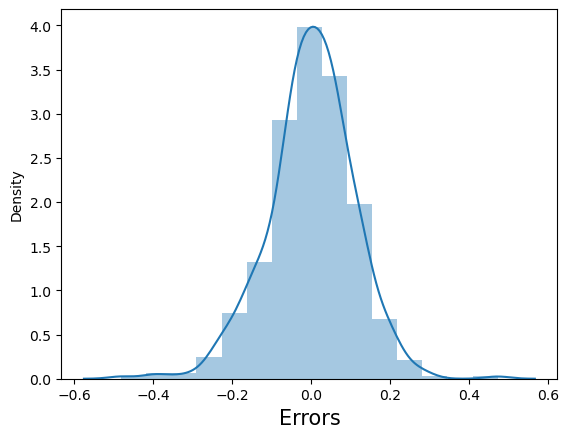

In [39]:
# viewing the plot of the error terms

import warnings
warnings.filterwarnings('ignore')

plt.figure()
sns.distplot((y_train - y_train_demand),bins=15)
plt.xlabel('Errors',fontsize=15)

It is clear that the error terms are distributed with their **mean** around **zero**.

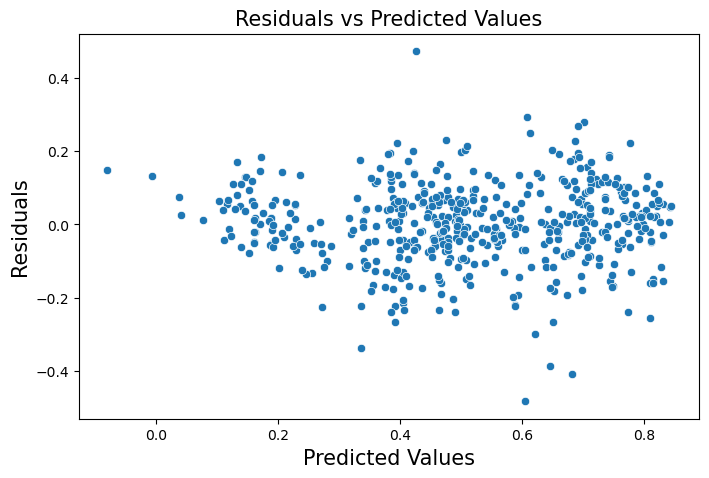

In [40]:
#plotting the residulas and the y_train predicted values

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_demand, y=y_train - y_train_demand)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residuals vs Predicted Values', fontsize=15)
plt.show()


It can be seen that the errors are to a large extend randomly distributed around zero, suggesting that the assumption of **'Homoscedasticity'** is met for the model.


## Making the prediction on test set:

In [41]:
#scaling the test set

numerics = ['mnth','weekday','hum','windspeed','temp','atemp','cnt']
bike_test[numerics] = scaler.transform(bike_test[numerics]) 

In [42]:
#viewing the test dataframe

bike_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.246575,0.255708,0.264840,0.652968,0.319635
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.432005,0.437258,0.442259,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#splitting y_test and X_test

y_test = bike_test.pop('cnt')
X_test = bike_test

In [44]:
#adding constant 

X_test_m4 = sm.add_constant(X_test)

In [45]:
#dropping the features that were dropped in model 4

X_test_m4 = X_test_m4.drop(['temp','atemp','hum','mnth'],axis=1)

In [46]:
#making the prediction

y_test_pred = lr_4.predict(X_test_m4)

## Model evaluation:

Text(0, 0.5, 'y_pred')

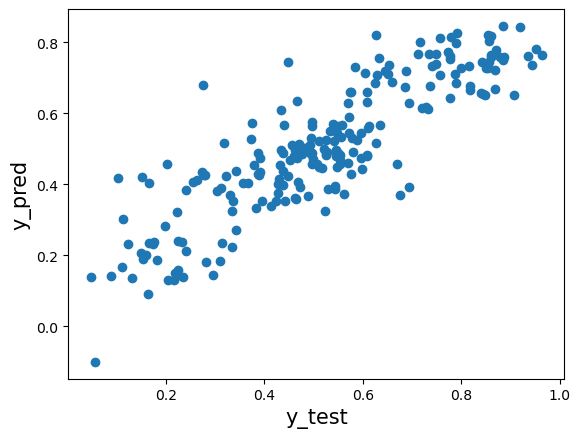

In [47]:
#plotting y_test and predicted data as a scatter plot

fig = plt.figure()
plt.scatter(y_test,y_test_pred)               
plt.xlabel('y_test', fontsize=15)                         
plt.ylabel('y_pred', fontsize=15)  

In [48]:
#checking the R2 score of the prediction

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.7450301154629461

The R2 score of predicted set is **0.745**, while the adjusted R2 score for the learning model was **0.759**, suggesting that the model is able to predict the test set with similar accuracy to the training set.

The final equation for the model,

 **cnt = 0.1779 + 0.2478*yr - 0.0687*holiday + 0.0505*weekday + 0.0209*workingday -0.1758*windspeed + 0.0835*season_fall - 0.2294*season_spring + 0.0256*season_summer + 0.2958*weathersit_clear + 0.2061*weathersit_cloudy**

## Conclusions:

It is clearly seen the features influencing demand for bikes the most are **year, season(spring) and weather**.

It is seen that the demand for bikes has increased from year **2018 to 2019**.

It can also be seen **windspeed** negatively affects demand for bikes.

It is observed that the season of **spring** drastically affects the demand for bikes.

The weather is a strong influence in the demand for bikes with the highest impact being the demand for bikes on clear weather days with a beta coeeficient value of **0.2958**.

The feature **'temp'** which was an important predictor of demand with a beta coefficient value of ~0.45 was dropped due to high VIF value, it would be interesting to see if it is retained when using RFE to eliminate features.**

## Model using Recursive Feature Elimination (RFE):

In [49]:
#fitting the model using sklearn 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
#using RFE to get 10 feature variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)
X_train_rfe = rfe.fit(X_train,y_train)


In [51]:
#seeing the features to be eliminated

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#adding the selected features to X_train_rfe

col = X_train.columns[rfe.support_]
X_train_rfe=X_train[col]

The features to be eliminated according to RFE are **'mnth', 'workingday', 'season_summer', 'weekday'**.

RFE has retained an important predictor for demand in the feature **'temp'** unlike our previous models.

**Summary of the model using statsmodel**

In [52]:
#adding constant and fitting the model

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()


In [53]:
#seeing the summary 

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.94e-180
Time:                        18:54:55   Log-Likelihood:                 480.00
No. Observations:                 510   AIC:                            -938.0
Df Residuals:                     499   BIC:                            -891.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1324      0.046      2.861      0.004       0.041       0.223
yr                    0.2321      0.009     27.045      0.000       0.215       0.249
holiday              -0.0804      0.027     -2.985      0.003      -0.133      -0.027
temp                  0.4008      0.141      2.839      0.005       0.123       0.678
atemp                 0.0508      0.145      0.349      0.727      -0.235       0.337
hum                  -0.1181      0.039     -3.011      0.003      -0.195      -0.041
windspeed            -0.1897      0.028     -6.864      0.000      -0.244      -0.135
season_fall          -0.0516      0.014     -3.665      0.000      -0.079      -0.024
season_spring        -0.1483      0.013    -11.673      0.000      -0.173      -0.123
weathersit_clear      0.2383      0.028      8.534      0.000       0.183       0.293
weathersit_cloudy     0.1802      0.026      6.826      0.000       0.128       0.232
==============================================================================
Omnibus:                       54.961   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.803
Skew:                          -0.586   Prob(JB):                     7.93e-28
Kurtosis:                       5.121   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The feature 'atemp' is statistically insignificant and hence will be removed

In [54]:
#dropping feature

X_train_rfe2 = X_train_rfe.drop(['atemp'],axis=1)


In [55]:
#building the model again 

lm = sm.OLS(y_train,X_train_rfe2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.25e-181
Time:                        18:54:56   Log-Likelihood:                 479.94
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     500   BIC:                            -897.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1325      0.046      2.867      0.004       0.042       0.223
yr                    0.2320      0.009     27.067      0.000       0.215       0.249
holiday              -0.0808      0.027     -3.002      0.003      -0.134      -0.028
temp                  0.4487      0.032     13.912      0.000       0.385       0.512
hum                  -0.1173      0.039     -2.999      0.003      -0.194      -0.040
windspeed            -0.1916      0.027     -7.077      0.000      -0.245      -0.138
season_fall          -0.0526      0.014     -3.818      0.000      -0.080      -0.026
season_spring        -0.1485      0.013    -11.714      0.000      -0.173      -0.124
weathersit_clear      0.2390      0.028      8.584      0.000       0.184       0.294
weathersit_cloudy     0.1807      0.026      6.863      0.000       0.129       0.232
==============================================================================
Omnibus:                       54.048   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.916
Skew:                          -0.576   Prob(JB):                     2.04e-27
Kurtosis:                       5.111   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#finding the VIF value for the new model 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns

#finding the VIF and rounding to 2 decimals 

vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

#sorting the values in descending order

vif = vif.sort_values(by ="VIF", ascending = False)
vif

,Features,VIF
0,const,119.81
8,weathersit_clear,10.16
9,weathersit_cloudy,8.77
3,temp,2.97
6,season_fall,2.06
4,hum,1.82
7,season_spring,1.66
5,windspeed,1.18
1,yr,1.03
2,holiday,1.01


Ignoring the VIF value of the constant, the VIF of all the other features are acceptable with the feature **'weathersit_clear'** slightly above **10**, but given its statistical significance and it being an important predictor of demand, it is not removed.

## Residual Analysis for the RFE model:

In [57]:
#making the prediction of the training data

y_train_rfe = lm.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

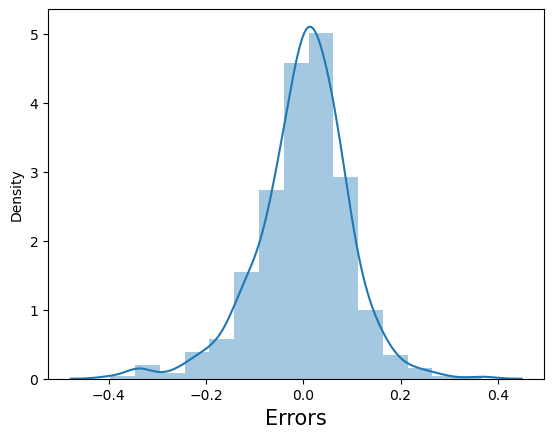

In [58]:
#plotting the residuals

plt.figure()
sns.distplot((y_train - y_train_rfe),bins=15)
plt.xlabel('Errors',fontsize=15)

The **mean** of the errors is at **zero** and it is normally distributed, conforming with the assumptions of linear regression**

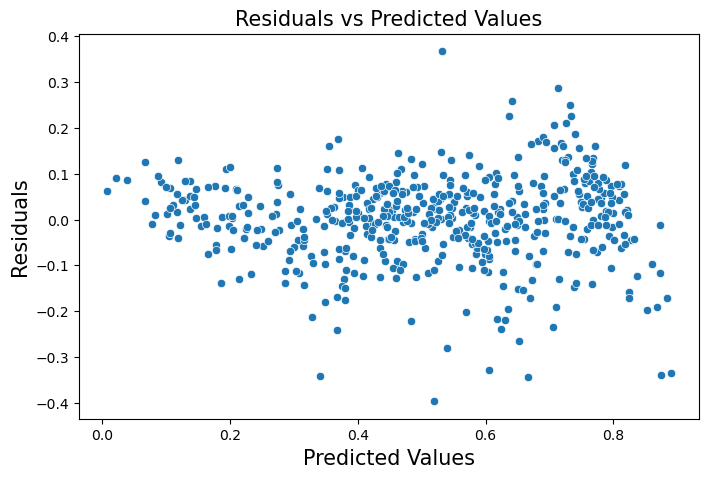

In [59]:
#checking for homoscedasticity

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_rfe, y=y_train - y_train_rfe)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residuals vs Predicted Values', fontsize=15)
plt.show()

Like before, the error terms show **'Homoscedasticity'** in their distribution with respect to the prediction.

## Prediction on the test set:

In [60]:
#checking the test data 

bike_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,weathersit_clear,weathersit_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558941,0.532991,0.638508,0.313350,0.246575,0.255708,0.264840,0.652968,0.319635
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233698,0.217888,0.148974,0.159947,0.432005,0.437258,0.442259,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#initialising y_test and X_test

y_test_rfe = y_test
X_test_rfe = bike_test

In [62]:
#adding the constant and dropping the features dropped using RFE

X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe = X_test_rfe.drop(['mnth','workingday','weekday','season_summer','atemp'],axis=1)

X_test_rfe.head(10)

,const,yr,holiday,temp,hum,windspeed,season_fall,season_spring,weathersit_clear,weathersit_cloudy
184,1.0,0,1,0.831783,0.657364,0.084219,1,0,0,1
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,1,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,1,0,1,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,1,0
404,1.0,1,0,0.256524,0.579218,0.326196,0,1,1,0
198,1.0,0,0,0.856704,0.671103,0.372990,1,0,1,0
171,1.0,0,0,0.774672,0.793903,0.276724,1,0,0,1
512,1.0,1,1,0.814131,0.696865,0.331536,0,0,1,0
200,1.0,0,0,0.883701,0.728638,0.153738,1,0,1,0


In [63]:
#making the prediction

y_test_rfe_pred = lm.predict(X_test_rfe)

## Model Evaluation:

Text(0, 0.5, 'y_rfe_pred')

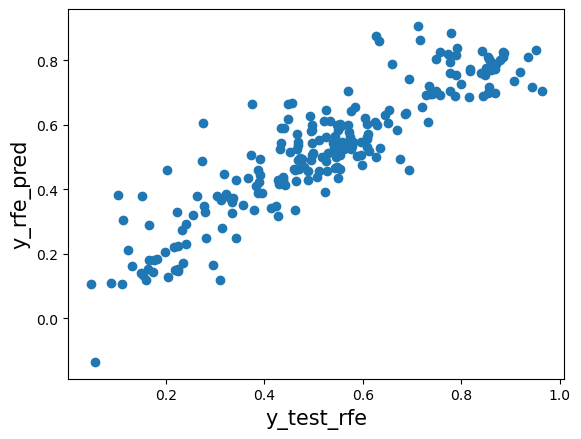

In [64]:
#plotting the y_test_rfe and the predicted data as a scatter plot

fig = plt.figure()
plt.scatter(y_test_rfe,y_test_rfe_pred)               
plt.xlabel('y_test_rfe', fontsize=15)                         
plt.ylabel('y_rfe_pred', fontsize=15)  

In [66]:
#checking the R2 score of the prediction

from sklearn.metrics import r2_score
r2_score(y_test_rfe, y_test_rfe_pred)

0.8011077452436954

Using RFE has definitely improved the R2 score from **0.745** in the previous chosen model **'lr_4'** to **0.8** in this model.

The R2 score of **0.8** is also very close to the adjusted R2 value of the model **0.82** showing the model is pretty accurate in its prediction on the test set.

The final equation for this model using RFE,

**cnt = 0.1325 + 0.2320*yr -0.08*holiday + 0.4487*temp - 0.1173*hum - 0.1916*windspeed - 0.0526*season_fall - 0.1485*season_spring + 0.239*weathersit_clear + 0.1807*weathersit_cloudy**

## Comparing the selected models:

The new model using RFE has improved the adjusted R2 score to **0.8** and also the F-statistic value suggests that the model is statistically significant.

It has also retained the feature 'temp' which is the strongest predictor of demand for bikes with more than twice the beta coefficient value of any other predictor with a value of **~0.45**, which we dropped in the previous model due to high VIF value.

It can be deduced that eliminating features just based on high VIF scores may not be a wise choice in building a model, It is evident that features with high VIF values can also be strong predictors of the target variable. 

So it might be prudent to remove features that don't predict the target variable that well and rechecking the VIF scores as opposed to blindly eliminating features that have the highest VIF scores assuming all the features are already statistically significant.

The RFE model2 is the final model selected in predicting the demand for bikes. 

## Conclusions:

The features temperature and weather are the strongest predictors of demand for bikes in the years **2018** and **2019**.

The demand for bikes has also improved across the two years.

The feature variables are able to account 80% variation in the taraget variable with an adjusted R2 score of **0.82**.

The final model has a low **Prob(F-Statistic)** value of **1.25e-181**, suggesting the model is statistically signifant.

The VIF scores of all the features are below **10** with only **weathersit_clear** slightly above 10 **10.16** and it is not removed as its statistically significant and a strong predictor of the target variable

## Objectives:
    
**Which variables are significant in predicting the demand for shared bikes?**

The features temperature, weather and year are the strongest predictors of demand for bikes while the other features have a negative influence on demand with windspeed significantly reducing demand.

**How well those variables describe the bike demands?**

The variables together are able to account for around **82%** variation in the training data, while they account for **80%** variation in the test data with a 70:30 split on the data for train and test data respectively.